In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

In [2]:
data = pd.read_csv("healthcare-dataset-stroke-data.csv")

In [3]:
data.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [4]:
data.shape

(5110, 12)

In [5]:
data.isnull().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [7]:
data.columns

Index(['id', 'gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')

In [8]:
data['stroke'].value_counts()

0    4861
1     249
Name: stroke, dtype: int64

In [9]:
data.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


In [10]:
data.corr()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
id,1.000000,0.003538,0.003550,-0.001296,0.001092,0.003084,0.006388
age,0.003538,1.000000,0.276398,0.263796,0.238171,0.333398,0.245257
hypertension,0.003550,0.276398,1.000000,0.108306,0.174474,0.167811,0.127904
heart_disease,-0.001296,0.263796,0.108306,1.000000,0.161857,0.041357,0.134914
avg_glucose_level,0.001092,0.238171,0.174474,0.161857,1.000000,0.175502,0.131945
bmi,0.003084,0.333398,0.167811,0.041357,0.175502,1.000000,0.042374
stroke,0.006388,0.245257,0.127904,0.134914,0.131945,0.042374,1.000000


In [11]:
data.drop(['id'],axis=1,inplace = True)

In [12]:
data.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [13]:
data.nunique()

gender                  3
age                   104
hypertension            2
heart_disease           2
ever_married            2
work_type               5
Residence_type          2
avg_glucose_level    3979
bmi                   418
smoking_status          4
stroke                  2
dtype: int64

In [14]:
data['gender'].value_counts()

Female    2994
Male      2115
Other        1
Name: gender, dtype: int64

In [15]:
data = data.drop(data[data['gender']=='Other'].index)

In [16]:
data.shape

(5109, 11)

In [17]:
mean = data['bmi'].mean()
median = data['bmi'].median()
print(mean,median)

28.894559902200502 28.1


In [18]:
data['bmi'] = data['bmi'].fillna(mean)

In [19]:
data.isnull().sum()

gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

In [20]:
pie_df = pd.DataFrame(data.groupby('stroke')['stroke'].count())
pie_df

,stroke
stroke,
0,4860
1,249


<AxesSubplot:xlabel='gender', ylabel='stroke'>

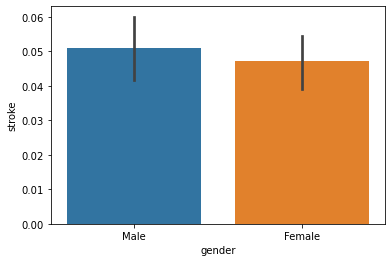

In [21]:
sns.barplot(data["gender"],data['stroke'])

# Data visualization

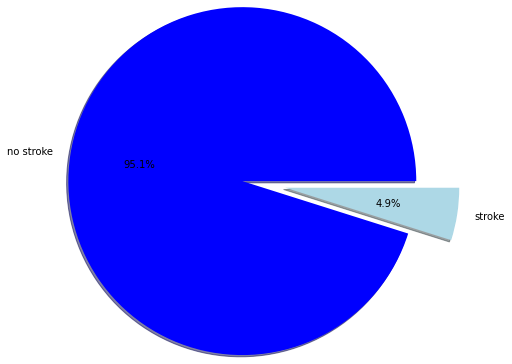

In [23]:
colors = ['blue','lightblue']
plt.pie(pie_df['stroke'],labels=['no stroke','stroke'],
        autopct='%.1f%%',colors=colors,radius=2,explode = (0, 0.5),shadow=True)
plt.show()

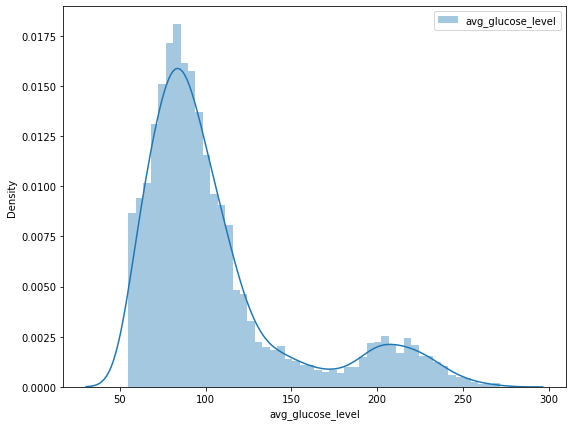

In [24]:
# sns.set_theme(style="darkgrid")
fig = plt.figure(figsize=(9,7))
sns.distplot(data['avg_glucose_level'], label="avg_glucose_level", kde= True)
plt.legend()

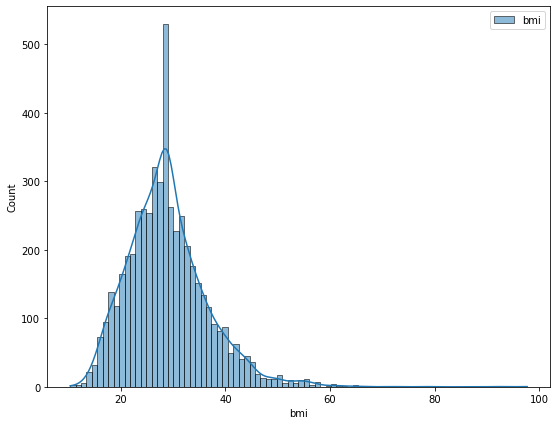

In [25]:
fig = plt.figure(figsize=(9,7))
sns.histplot(data['bmi'],  label="bmi", kde= True)
plt.legend()

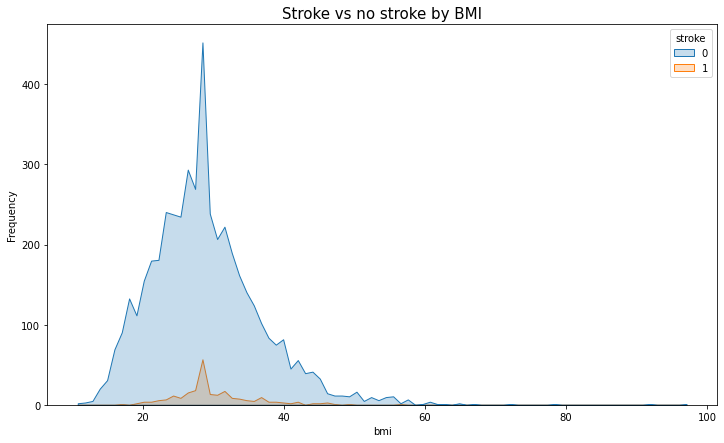

In [26]:
plt.figure(figsize=(12,7))
sns.histplot(
    data, x="bmi", hue="stroke",
    element="poly",
    stat="frequency", common_norm=False,
)
plt.title('Stroke vs no stroke by BMI', fontsize=15)
plt.show()

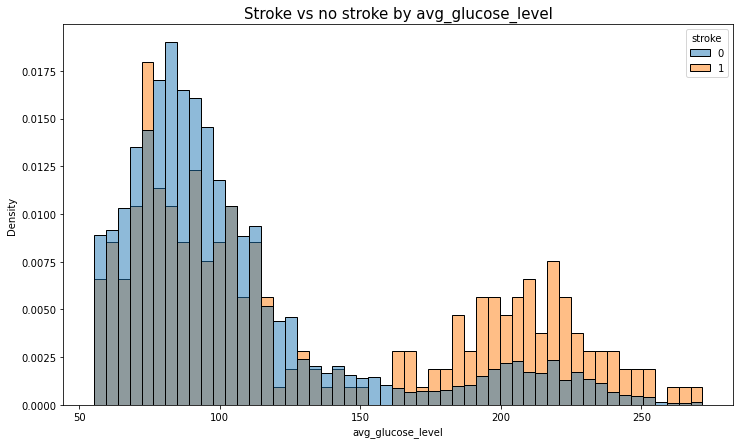

In [27]:
plt.figure(figsize=(12,7))
sns.histplot(
    data, x="avg_glucose_level", hue="stroke",

    stat="density",
     common_norm=False,
)
plt.title('Stroke vs no stroke by avg_glucose_level', fontsize=15)
plt.show()

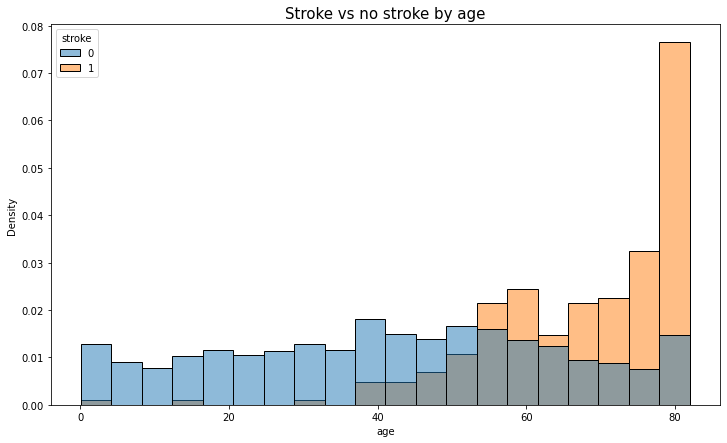

In [28]:
plt.figure(figsize=(12,7))
sns.histplot(
    data, x="age", hue="stroke",

    stat="density", common_norm=False,
)
plt.title('Stroke vs no stroke by age', fontsize=15)
plt.show()

In [29]:
from sklearn.preprocessing import LabelEncoder
obj_cols=['gender', 'ever_married', 'Residence_type']

lb=LabelEncoder()

for i in obj_cols:
    print(f"Value Counts of column:{i}")
    print(data.loc[:,i].value_counts())
    data[i] = lb.fit_transform(data[i])
    print("The classes which labeled from 0 are: ",lb.classes_,end="\n===========================================\n")

Value Counts of column:gender
Female    2994
Male      2115
Name: gender, dtype: int64
The classes which labeled from 0 are:  ['Female' 'Male']
Value Counts of column:ever_married
Yes    3353
No     1756
Name: ever_married, dtype: int64
The classes which labeled from 0 are:  ['No' 'Yes']
Value Counts of column:Residence_type
Urban    2596
Rural    2513
Name: Residence_type, dtype: int64
The classes which labeled from 0 are:  ['Rural' 'Urban']


In [30]:
data

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,1,67.0,0,1,1,Private,1,228.69,36.60000,formerly smoked,1
1,0,61.0,0,0,1,Self-employed,0,202.21,28.89456,never smoked,1
2,1,80.0,0,1,1,Private,0,105.92,32.50000,never smoked,1
3,0,49.0,0,0,1,Private,1,171.23,34.40000,smokes,1
4,0,79.0,1,0,1,Self-employed,0,174.12,24.00000,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...
5105,0,80.0,1,0,1,Private,1,83.75,28.89456,never smoked,0
5106,0,81.0,0,0,1,Self-employed,1,125.20,40.00000,never smoked,0
5107,0,35.0,0,0,1,Self-employed,0,82.99,30.60000,never smoked,0
5108,1,51.0,0,0,1,Private,0,166.29,25.60000,formerly smoked,0


In [31]:
data=pd.get_dummies(data)


In [32]:
data

,gender,age,hypertension,heart_disease,ever_married,Residence_type,avg_glucose_level,bmi,stroke,work_type_Govt_job,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,1,67.0,0,1,1,1,228.69,36.60000,1,0,0,1,0,0,0,1,0,0
1,0,61.0,0,0,1,0,202.21,28.89456,1,0,0,0,1,0,0,0,1,0
2,1,80.0,0,1,1,0,105.92,32.50000,1,0,0,1,0,0,0,0,1,0
3,0,49.0,0,0,1,1,171.23,34.40000,1,0,0,1,0,0,0,0,0,1
4,0,79.0,1,0,1,0,174.12,24.00000,1,0,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5105,0,80.0,1,0,1,1,83.75,28.89456,0,0,0,1,0,0,0,0,1,0
5106,0,81.0,0,0,1,1,125.20,40.00000,0,0,0,0,1,0,0,0,1,0
5107,0,35.0,0,0,1,0,82.99,30.60000,0,0,0,0,1,0,0,0,1,0
5108,1,51.0,0,0,1,0,166.29,25.60000,0,0,0,1,0,0,0,1,0,0


In [33]:
data.columns

Index(['gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'Residence_type', 'avg_glucose_level', 'bmi', 'stroke',
       'work_type_Govt_job', 'work_type_Never_worked', 'work_type_Private',
       'work_type_Self-employed', 'work_type_children',
       'smoking_status_Unknown', 'smoking_status_formerly smoked',
       'smoking_status_never smoked', 'smoking_status_smokes'],
      dtype='object')

In [34]:
x_data = data.drop("stroke" , axis = 1).values
y_data = data["stroke"]

# Data distrubtion

In [35]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train , y_test = train_test_split(x_data,y_data, test_size=0.25 )

# K-NN Classifier

In [36]:
from sklearn.neighbors import KNeighborsClassifier  
classifier= KNeighborsClassifier(n_neighbors=6)  
classifier.fit(x_train, y_train)  
print("Accuracy on Traing set: ",classifier.score(x_train,y_train))
print("Accuracy on Testing set: ",classifier.score(x_test,y_test))

Accuracy on Traing set:  0.9475332811276429
Accuracy on Testing set:  0.9632237871674492


# Decision Tree Classifier

In [37]:
from sklearn.tree import DecisionTreeClassifier
clfr = DecisionTreeClassifier(random_state=0)
clfr.fit(x_train,y_train)
print("Accuracy on Traing set: ",clfr.score(x_train,y_train))
print("Accuracy on Testing set: ",clfr.score(x_test,y_test))

Accuracy on Traing set:  1.0
Accuracy on Testing set:  0.9303599374021909


# Logistic Regression

In [38]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(x_train,y_train)
print("Accuracy on Traing set: ",lr.score(x_train,y_train))
print("Accuracy on Testing set: ",lr.score(x_test,y_test))

Accuracy on Traing set:  0.9470112242234403
Accuracy on Testing set:  0.9647887323943662


# Naive Bayes

In [39]:
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(x_train,y_train)
print("Accuracy on Traing set: ",nb.score(x_train,y_train))
print("Accuracy on Testing set: ",nb.score(x_test,y_test))

Accuracy on Traing set:  0.5437222657269642
Accuracy on Testing set:  0.5312989045383412


# SVM(Support Vector Machine)

In [40]:
from sklearn import svm
sv = svm.SVC(kernel='linear')
sv.fit(x_train, y_train)
print("Accuracy on Traing set: ",sv.score(x_train,y_train))
print("Accuracy on Testing set: ",sv.score(x_test,y_test))

Accuracy on Traing set:  0.9467501957713391
Accuracy on Testing set:  0.9647887323943662
